## Import and Read Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Dataset Mentah

dataset_raw_df = pd.read_csv ("Dataset\Indonesian News Dataset Splitted.csv")
dataset_raw_df.head()

,Unnamed: 0,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Presiden Joko Widodo telah memerintahkan Wakil...
2,2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Ketua MPR RI Bambang Soesatyo telah diangkat s...


## Preprocessing Dataset

In [3]:
# Memilih kolom yang digunakan pada dataset (cuma butuh text sama summary)

dataset_df = dataset_raw_df[["content", "summary"]]
dataset_df

,content,summary
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Presiden Joko Widodo telah memerintahkan Wakil...
2,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,Ketua MPR RI Bambang Soesatyo telah diangkat s...
...,...,...
995,JAKARTA - Indonesia Award Magazine memberi pen...,MNC Life Assurance meraih penghargaan Indonesi...
996,JAKARTA - Uang mencurigakan sebesar Rp300 tril...,Menkopolhukam Mahfud MD mengklarifikasi bahwa ...
997,JAKARTA - Harga minyak akhirnya naik lebih dar...,Harga minyak dunia naik lebih dari 1% di akhir...
998,Ketua Umum Partai NasDem Surya Paloh menegask...,"Ketua Umum NasDem, Surya Paloh, menyerahkan ke..."


In [4]:
# Bersih-bersih kalau ada whitespace atau ada simbol simbol yang aneh

import re

def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [5]:
# Di apply bersih-bersih yang tadi

brief_cleaning1 = text_strip(dataset_df['content'])
brief_cleaning2 = text_strip(dataset_df['summary'])

In [6]:
# Pake library spacy buat batch (ini kepake nanti sih pas pake dataset full, datanya kan cuma 1000, batch sizenya 5000 jadi rada gaguna sekarang)

import spacy
from spacy.lang.id import Indonesian
from time import time

nlp = Indonesian()  # Load Indonesian spaCy model

t = time()

text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_process=-1)]
print('Time to clean up text: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up text: 0.21 mins


In [7]:
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_process=-1)]
print('Time to clean up summary: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up summary: 0.44 mins


In [8]:
text[25]

'info nasional menteri pertanian syahrul yasin limpo meminta organisasi rumah petani nelayan nusantara rpnn untuk menggunakan anggaran kredit usaha rakyat kur sebagai dukungan bersama dalam meningkatkan produktivitas saya berharap rpnn mampu menggunakan kur sebagai dukungan bersama terhadap jalannya produksi dan usaha tani kami tidak ada bantuan karena yang ada hanya gagasan kata syahrul saat membuka rapat kerja nasional rpnn di komplek pusat pelatihan manajemen kepemimpinan ppmk ciawi bogor jawa barat sabtu maret 2023.syahrul menjelaskan kredit usaha rakyat adalah program yang dicanangkan presiden jokowi dalam membantu petani mendapatkan akses perkreditan program ini menjangkau semua petani dari berbagai kalangan di seluruh indonesia.terutama kalangan petani milenial yang memiliki kemampuan dalam mengunakan teknologi digitalisasi saya katakan salah satu fasilitas yang diberikan bapak presiden itu adalah kredit usaha rakyat tentu aksesnya dengan pengawalan yang sangat ketat dan rasanya

In [9]:
summary[25]

'_START_ menteri pertanian syahrul yasin limpo meminta organisasi rumah petani nelayan nusantara rpnn untuk menggunakan anggaran kredit usaha rakyat kur sebagai dukungan bersama dalam meningkatkan produktivitas kur adalah program yang dicanangkan presiden jokowi untuk membantu petani mendapatkan akses perkreditan ketua rpnn slamet mengatakan organisasinya siap mendukung kesuksesan program pemerintah dan membela kepentingan petani. _END_'

In [10]:
dataset_df['cleaned_text'] = pd.Series(text)
dataset_df['cleaned_summary'] = pd.Series(summary)

C:\Users\Sanja\AppData\Local\Temp\ipykernel_5724\3441996377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['cleaned_text'] = pd.Series(text)
C:\Users\Sanja\AppData\Local\Temp\ipykernel_5724\3441996377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['cleaned_summary'] = pd.Series(summary)


In [11]:
# Menghitung panjang text & summary

text_count = []
summary_count = []

for sent in dataset_df['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in dataset_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [12]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

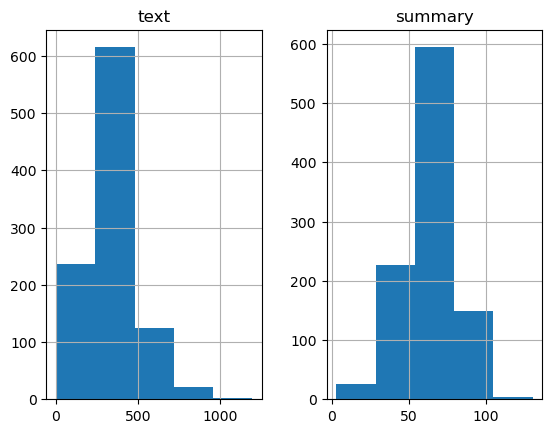

In [13]:
#Dijadiin graph biar keliatan rata-rata text itu panjangnya berapa

import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [14]:
# Dari graph kelihatan kalo mayoritas summary tuh ada di rentan 100 kata
# Check how much % of summary have 0-100 words

cnt=0
for i in dataset_df['cleaned_summary']:
    if(len(i.split())<=100):
        cnt=cnt+1
print("% of Text that have 0 - 100 word = ", (round(cnt/len(dataset_df['cleaned_summary']) * 100, 2)), "%")

% of Text that have 0 - 100 word =  99.5 %


In [15]:
# Dari graph kelihatan kalo mayoritas text tuh ada di rentan 900 kata
# Check how much % of text have 0-900 words

cnt=0
for i in dataset_df['cleaned_text']:
    if(len(i.split())<=900):
        cnt=cnt+1
print("% of Text that have 0 - 900 word = ", (round(cnt/len(dataset_df['cleaned_text']) * 100, 2)), "%")

% of Text that have 0 - 900 word =  99.5 %


In [16]:
# Model to summarize the text between 0-100 words for Summary and 0-900 words for Text
# Diset max nya untuk buang outlier
max_text_len=900
max_summary_len=100

In [17]:
# Select the Summaries and Text between max len defined above

cleaned_text =np.array(dataset_df['cleaned_text'])
cleaned_summary=np.array(dataset_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [18]:
post_pre.head()

,text,summary
0,tempo.co jakarta anggota komisi vii dpr ri rof...,_START_ anggota komisi vii dpr ri rofik hanant...
1,tempo.co jakarta presiden joko widodo atau jok...,_START_ presiden joko widodo telah memerintahk...
2,info nasional wakil ketua mpr ri dr hidayat nu...,_START_ wakil ketua mpr ri dr hidayat nur wahi...
3,tempo.co jakarta tim kedokteran dan kesehatan ...,_START_ tim kedokteran dan kesehatan dokkes po...
4,info nasional ketua mpr ri sekaligus ketua umu...,_START_ ketua mpr ri bambang soesatyo telah di...
